In [1]:
import os
import numpy as np
import mne
import matplotlib.pyplot as plt

data_folder = "/home/dog/Documents/EEGDataSet/p300/inria_bci_challenge/npy_zerophase_baseline10/200/test"

train_data_folder = "/home/dog/Documents/EEGDataSet/p300/inria_bci_challenge/npy_zerophase_baseline10/200/train"

chan_names = ['Fp1', 'Fp2', 'AF7', 'AF3', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4',
              'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'T7',
              'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz',
              'CP2', 'CP4', 'CP6', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8',
              'PO7', 'POz', 'PO8', 'O1', 'O2']

ERN_info = mne.create_info(chan_names, sfreq=200, ch_types='eeg')

In [2]:
def load_cam_data_trials(data_folder, subject, label2CAM, num2CAM):
    # load ndarray data and labels
    subject_data_dir = os.path.join(data_folder, subject+'_data.npy')
    subject_data = np.load(subject_data_dir)
    # subject_data = np.expand_dims(subject_data, axis=1)  # Just for NoPrecess

    subject_label_path = os.path.join(data_folder, subject+'_label.npy')
    subject_label = np.load(subject_label_path)
    all_label_trial = np.where(subject_label == label2CAM)[0][num2CAM]
    return subject_data[all_label_trial]

def plot_cz_trials(data_folder, subject, label2CAM, num2CAM):
    cz_data1 = load_cam_data_trials(data_folder, subject=subject, label2CAM=label2CAM, num2CAM=num2CAM)[:, 28]
    cz_data_mean1 = np.mean(cz_data1, axis=0)
    plt.plot(np.arange(250)/200, cz_data_mean1, color='r')
    plt.legend(labels=['label{}'.format(label2CAM)], loc='best')
    plt.title('subject{}_Cz'.format(subject))
    plt.show()

In [3]:
# 得到每个被试挑选出来的trial label 0 list
A03_label0_ls = [8, 35, 42, 43, 47, 85, 136, 141]  # 8
A09_label0_ls = [1, 7, 9, 10, 14, 19, 20, 28, 44]  # 9
A10_label0_ls = [1, 7, 10, 11, 14, 23, 24]  # 7
A08_label0_ls = [9, 11, 15, 19, 31, 32, 39, 65, 89, 90]  # 10
A01_label0_ls = [2, 3, 6, 10, 18, 55, 58]  # 7
A05_label0_ls = [3, 72, 88, 94, 196]  # 5
A04_label0_ls = [0, 8, 9, 13, 16, 18, 26, 27, 28, 32, 45, 46, 54, 55, 64]  # 15
A15_label0_ls = [1, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19]  # 16
A19_label0_ls = [9, 10, 12, 36, 48]  # 5
A25_label0_ls = [0, 18, 22, 28, 113]  # 5

label0_total = {'A09':A09_label0_ls, 'A01':A01_label0_ls, 'A04':A04_label0_ls, 'A03':A03_label0_ls, 
                'A05':A05_label0_ls, 'A08': A08_label0_ls,  'A10': A10_label0_ls, 'A15':A15_label0_ls, 
                'A25': A25_label0_ls, 'A19':A19_label0_ls}

# label 1 list
A01_label1_ls = [24, 32, 64, 79, 89, 105, 129]  # 7
A03_label1_ls = [22, 24, 26, 33, 43, 46, 52, 56]  # 8
A04_label1_ls = [4, 5, 8, 11, 14, 18, 26, 29, 30, 39, 47, 53, 55, 57, 58]  # 15
A05_label1_ls = [48, 51,67, 86, 104]  # 5
A08_label1_ls = [19, 58, 80, 103, 129, 163, 203, 224, 239, 240]  # 10
A09_label1_ls = [76, 84, 94, 101, 105, 106, 110, 115, 116]  # 9
A10_label1_ls = [30, 154, 164, 183, 207, 214, 264]  # 7
A15_label1_ls = [25, 29, 59, 68, 82, 92, 113, 121, 145, 149, 216, 227, 250, 258, 275, 309]  # 16
A19_label1_ls = [4,  5,   16, 41, 63]  # 5
A25_label1_ls = [29, 76, 94, 98, 124]

label1_total = {'A09':A09_label1_ls, 'A01':A01_label1_ls, 'A04':A04_label1_ls, 'A03':A03_label1_ls,
                'A05':A05_label1_ls, 'A08': A08_label1_ls,  'A10': A10_label1_ls, 'A15':A15_label1_ls, 
                'A25': A25_label1_ls, 'A19':A19_label1_ls}

(87, 250)


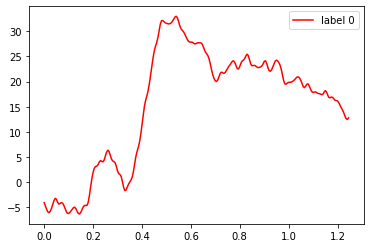

In [4]:
# %matplotlib notebook
# 绘制label0 Cz图
label0_trials = []
for key,value in label0_total.items():
    sub_trials = load_cam_data_trials(data_folder, key, 0, value)[:, 28]  # only cz data
#     sub_trials_repeat = np.repeat(sub_trials, 3, axis=0)
    label0_trials.append(sub_trials)
label0_trials = np.concatenate(label0_trials, axis=0)
print(label0_trials.shape)  # 135, 250

cz_data_mean0 = np.mean(label0_trials, axis=0)
# np.savetxt('cz_data_mean0.csv', cz_data_mean0, delimiter=',')
plt.plot(np.arange(250)/200, cz_data_mean0, color='r')
plt.legend(labels=['label 0'], loc='best')
# plt.title('All subject label 0 Cz')
# plt.savefig('All_subject_label0_Cz.eps' ,dpi=300,format='eps')

(87, 250)


Text(0.5, 1.0, 'All subject label 1 Cz')

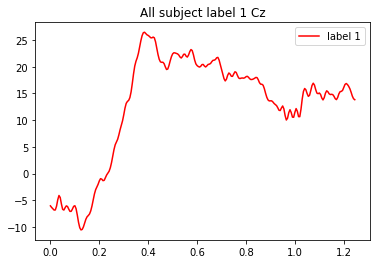

In [5]:
# 绘制label1 Cz图
label1_trials = []
for key,value in label1_total.items():
    sub_trials = load_cam_data_trials(data_folder, key, 1, value)[:, 28]  # only cz data
#     sub_trials_repeat = np.repeat(sub_trials, 3, axis=0)
    label1_trials.append(sub_trials)
label1_trials = np.concatenate(label1_trials, axis=0)
print(label1_trials.shape)  # 135, 250

cz_data_mean1 = np.mean(label1_trials, axis=0)
np.savetxt('cz_data_mean1.csv', cz_data_mean1, delimiter=',')
plt.plot(np.arange(250)/200, cz_data_mean1, color='r')
plt.legend(labels=['label 1'], loc='best')
plt.title('All subject label 1 Cz')
# plt.savefig('All_subject_label1_Cz.eps' ,dpi=300,format='eps')

Text(0.5, 1.0, 'All subject Cz label 1 - label 0')

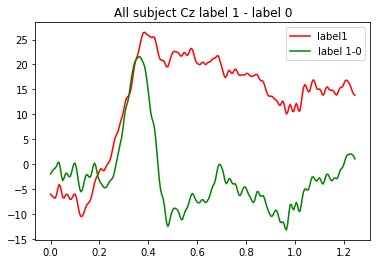

In [6]:
plt.plot(np.arange(250)/200, cz_data_mean1, color='r')
plt.plot(np.arange(250)/200, cz_data_mean1-cz_data_mean0, color='g')
plt.legend(labels=['label1', 'label 1-0',], loc='best')
plt.title('All subject Cz label 1 - label 0')
# plt.savefig('All_subject_label1-0_Cz_label1.eps' ,dpi=300,format='eps')

Text(0.5, 1.0, 'All subject Cz label 1 - label 0')

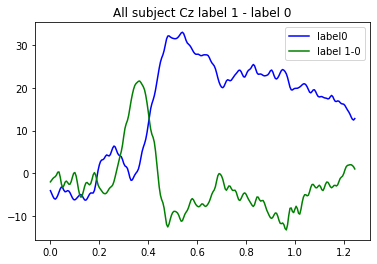

In [7]:
plt.plot(np.arange(250)/200, cz_data_mean0, color='b')
plt.plot(np.arange(250)/200, cz_data_mean1-cz_data_mean0, color='g')
plt.legend(labels=['label0', 'label 1-0',], loc='best')
plt.title('All subject Cz label 1 - label 0')
# plt.savefig('All_subject_label1-0_Cz_label0.eps' ,dpi=300,format='eps')

Text(0.5, 1.0, 'All subject Cz label 0 - label 1')

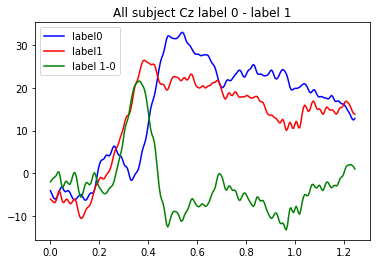

In [8]:
plt.plot(np.arange(250)/200, cz_data_mean0, color='b')
plt.plot(np.arange(250)/200, cz_data_mean1, color='r')
plt.plot(np.arange(250)/200, cz_data_mean1-cz_data_mean0, color='g')
plt.legend(labels=['label0','label1', 'label 1-0',], loc='best')
plt.title('All subject Cz label 0 - label 1')
# plt.savefig('All_subject_label0_label1_label1-0_Cz.eps' ,dpi=300,format='eps')

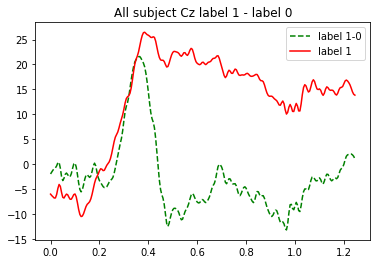

In [9]:
plt.plot(np.arange(250)/200, cz_data_mean1-cz_data_mean0, color='g', ls='--')
plt.plot(np.arange(250)/200, cz_data_mean1, color='r')
plt.legend(labels=['label 1-0', 'label 1'], loc='best')
plt.title('All subject Cz label 1 - label 0')
plt.show()

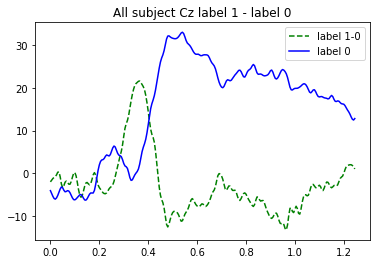

In [10]:
plt.plot(np.arange(250)/200, cz_data_mean1-cz_data_mean0, color='g', ls='--')
cz_data_mean0 = np.mean(label0_trials, axis=0)
plt.plot(np.arange(250)/200, cz_data_mean0, color='b')
plt.legend(labels=['label 1-0', 'label 0'], loc='best')
plt.title('All subject Cz label 1 - label 0')
plt.show()

## 绘制神经网络特征显著性图

In [11]:
import pandas as pd 

cam_folder = '/home/dog/code_T640/EignCAM/eeg_cam_fig'
eigengradcam_name = 'eigencam_channel_label0_[43].csv'


def cam_label_ls(label2CAM, ls):
    cam_ls = []
    for i in ls:
        trial_label = 'eigencam_channel_label{}_[{}].csv'.format(label2CAM, i)
        cam_ls.append(trial_label)
    return cam_ls

def cam_trial_csv(subject, eigengradcam_name, cam_folder=cam_folder):
    '''
    返回一个包含不同trial数的list
    '''
    cam_trial = []
    if isinstance(eigengradcam_name, list):
        for i in eigengradcam_name:
            cam_path = os.path.join(cam_folder, subject, i)
            cam_pd = pd.read_csv(cam_path, header=None)
            cam_np = cam_pd.to_numpy()
            cam_trial.append(cam_np)
    else:
        cam_path = os.path.join(cam_folder, subject, eigengradcam_name)
        cam_pd = pd.read_csv(cam_path, header=None)
        cam_np = cam_pd.to_numpy()
        cam_trial.append(cam_np)
    return np.array(cam_trial)


In [12]:
#  test trial csv
import pandas as pd
cam_path = os.path.join(cam_folder, 'A03', eigengradcam_name)
print(cam_path)
cam_pd = pd.read_csv(cam_path, header=None)
cam_np = cam_pd.to_numpy()
print(cam_np.shape)

/home/dog/code_T640/EignCAM/eeg_cam_fig/A03/eigencam_channel_label0_[43].csv
(56, 250)


In [13]:
def get_sub_mean(subject, label2CAM):
    assert label2CAM in [0 , 1]
    sub_dic = label1_total if label2CAM==1 else label0_total
    cam_ls = cam_label_ls(label2CAM, sub_dic[subject])
    
    sub_trials = cam_trial_csv(subject, cam_ls)
    sub_trials_mean = np.mean(sub_trials, axis=0)
    return sub_trials_mean

#     A03_label0_mean = sum(cam_ls)/len(cam_ls)
#     plt.title(subject+'label{}  mean'.format(label2CAMabel2CAM))
#     plt.plot(np.arange(250)/200, A03_label0_mean)

In [14]:
label0_cam = []
for key,value in label0_total.items():
    sub_cam_value = get_sub_mean(key, 0)
    label0_cam.append(sub_cam_value)
    
label0_cam_ = np.array(label0_cam)


label1_cam = []
for key,value in label1_total.items():
    sub_cam_value = get_sub_mean(key, 1)
    label1_cam.append(sub_cam_value)
    
label1_cam_ = np.array(label1_cam)
print('label1_cam_: ', label1_cam_.shape)


label0_cam = np.mean(label0_cam_, axis=1)
label1_cam = np.mean(label1_cam_, axis=1)

print('label0_cam shape: ', label1_cam.shape)
print('label0_cam shape: ', label0_cam.shape)
# np.savetxt('AllSubject_label0_eigencam.csv', label0_cam, delimiter=',')
# np.savetxt('AllSubject_label1_eigencam.csv', label1_cam, delimiter=',')

label1_cam_:  (10, 56, 250)
label0_cam shape:  (10, 250)
label0_cam shape:  (10, 250)


## 直接利用channel convolution layer的信息显示脑地形图

In [15]:
label0_all_cam = np.mean(label0_cam_, axis=0)
label1_all_cam = np.mean(label1_cam_, axis=0)
print(label0_all_cam.shape)
print(label1_all_cam.shape)

(56, 250)
(56, 250)


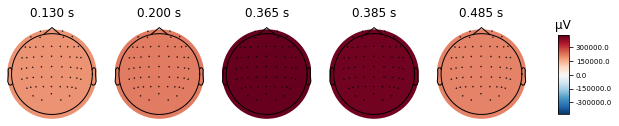

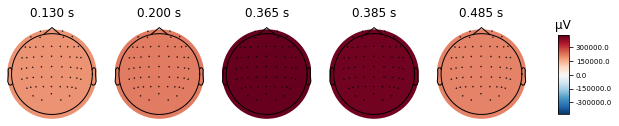

In [16]:
evoked = mne.EvokedArray(label0_all_cam, info=ERN_info, tmin=0, nave=56)
evoked.set_montage('standard_1020')
# fig = evoked.plot_sen?sors(show_names=True, sphere='auto')
evoked.plot_topomap(times=[0.13, 0.2, 0.365, 0.385, 0.485])
# plt.savefig('label0_INtemporalEigenCAM_allMean.png', dpi=600, bbox_inches='tight') # 解决图片不清晰，不完整的问题

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


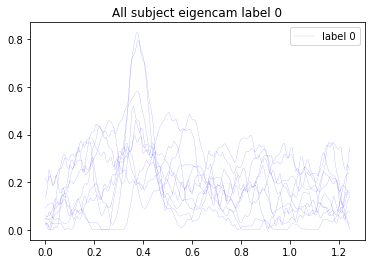

In [17]:
# plot all subject in a fig lable 0
plt.plot(np.arange(250)/200, np.transpose(label0_cam), color='b', linewidth=0.1)
plt.legend(labels=['label 0'], loc='best')
plt.title('All subject eigencam label 0')
plt.savefig('All_subject_eigencam_label0.eps' ,dpi=300,format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


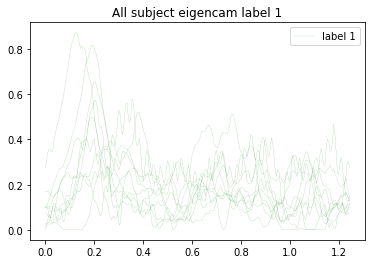

In [18]:
# plot all subject in a fig lable 1
plt.plot(np.arange(250)/200, np.transpose(label1_cam), color='g', linewidth=0.1)
plt.legend(labels=['label 1'], loc='best')
plt.title('All subject eigencam label 1')
plt.savefig('All_subject_eigencam_label1.eps' ,dpi=300, format='eps')

In [19]:
# 绘制神经网络特征显著性图 label 0 (全部的平均)
# print(label0_cam.shape)
label0_cam_mean = np.mean(label0_cam, axis=0)
label0_expand = np.expand_dims(label0_cam_mean, 0)
label0_cam_mean_repeat10 = np.repeat(label0_expand, 10, axis=0)
# print(label0_cam_mean_repeat10.shape)

# 绘制神经网络特征显著性图 label 1 (全部的平均)
# print(label1_cam.shape)
label1_cam_mean = np.mean(label1_cam, axis=0)
label1_expand = np.expand_dims(label1_cam_mean, 0)
label1_cam_mean_repeat10 = np.repeat(label1_expand, 10, axis=0)
# print(label1_cam_mean_repeat10.shape)

In [20]:
print(label0_cam_mean.shape)
print(label1_cam_mean.shape)
print('* * ')
print(np.where(label0_cam_mean==np.max(label0_cam_mean)))  # eigengradCAM 79 对应0.395s; eigencam 73, 对应0.365
print(np.where(label1_cam_mean==np.max(label1_cam_mean)))  # eigengradCAM 38  对应: 0.19s; eigen 40, 对应0.2s

(250,)
(250,)
* * 
(array([73]),)
(array([40]),)


## 将Eigen-CAM的结果绘制成曲线

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


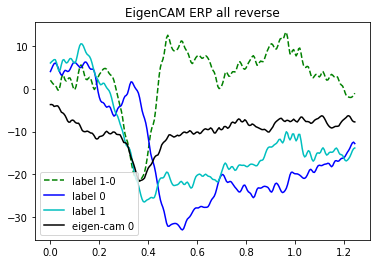

In [21]:
plt.plot(np.arange(250)/200, -(cz_data_mean1-cz_data_mean0), color='g', ls='--')
cz_data_mean0 = np.mean(label0_trials, axis=0)
plt.plot(np.arange(250)/200, -cz_data_mean0, color='b')
plt.plot(np.arange(250)/200, -cz_data_mean1, color='c')
# plt.plot(np.arange(250)/200, -label0_cam_mean*50, color='k')
plt.legend(labels=['label 1-0', 'label 0', 'label 1', 'eigen-cam 0'], loc='best')
plt.title('EigenCAM ERP all reverse')
# plt.show()
plt.savefig('EigenCAM_ERP_all_reverse.eps' ,dpi=600, format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


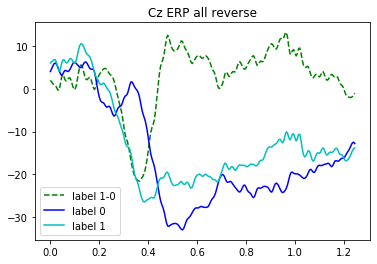

In [22]:
plt.plot(np.arange(250)/200, -(cz_data_mean1-cz_data_mean0), color='g', ls='--')
cz_data_mean0 = np.mean(label0_trials, axis=0)
plt.plot(np.arange(250)/200, -cz_data_mean0, color='b')
plt.plot(np.arange(250)/200, -cz_data_mean1, color='c')
# plt.plot(np.arange(250)/200, -label0_cam_mean*50, color='k')
plt.legend(labels=['label 1-0', 'label 0', 'label 1'], loc='best')
plt.title('Cz ERP all reverse')
# plt.show()
plt.savefig('Cz_ERP_all_reverse.eps' ,dpi=600, format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


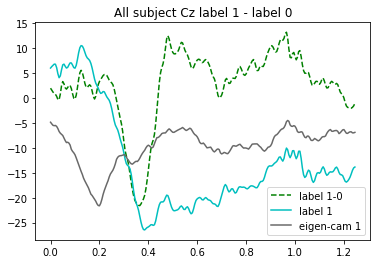

In [22]:
plt.plot(np.arange(250)/200, -cz_data_mean1+cz_data_mean0, color='g', ls='--')
plt.plot(np.arange(250)/200, -cz_data_mean1, color='c')
plt.plot(np.arange(250)/200, -label1_cam_mean*50, color='dimgrey')
plt.legend(labels=['label 1-0', 'label 1', 'eigen-cam 1'], loc='best')
plt.title('All subject Cz label 1 - label 0')
# plt.show()
plt.savefig('EigenCAM_ERP_label1_reverse.eps' ,dpi=600, format='eps')

In [19]:
import cv2
def show_cam_on_image(img: np.ndarray,
                      mask: np.ndarray,
                      use_rgb: bool = False,
                      colormap: int = cv2.COLORMAP_JET) -> np.ndarray:
    """ This function overlays the cam mask on the image as an heatmap.
    By default the heatmap is in BGR format.

    :param img: The base image in RGB or BGR format.
    :param mask: The cam mask.
    :param use_rgb: Whether to use an RGB or BGR heatmap, this should be set to True if 'img' is in RGB format.
    :param colormap: The OpenCV colormap to be used.
    :returns: The default image with the cam overlay.
    """
    heatmap = cv2.applyColorMap(np.uint8(255 * mask), colormap)
    if use_rgb:
        heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
    heatmap = np.float32(heatmap) / 255

    if np.max(img) > 1:
        raise Exception(
            "The input image should np.float32 in the range [0, 1]")

    cam = heatmap + img
    cam = cam / np.max(cam)
    return np.uint8(255 * cam)

In [20]:
fake_input = np.zeros_like(label0_cam_mean_repeat10)
fake_input = np.expand_dims(fake_input, -1)
cam_image = show_cam_on_image(fake_input, label0_cam_mean_repeat10, use_rgb=False)
cv2.imwrite('All_label_0_eigencam_mean.jpg', cam_image)

True

In [21]:
fake_input1 = np.zeros_like(label1_cam_mean_repeat10)
fake_input1 = np.expand_dims(fake_input1, -1)
cam_image1 = show_cam_on_image(fake_input1, label1_cam_mean_repeat10, use_rgb=False)
cv2.imwrite('All_label_1_eigencam_mean.jpg', cam_image1)

True